# Data Project #5 - Neural Networks 


## Key Indicators of Heart Disease Dataset

2020 annual CDC survey data of ~400k adults related to their health status

url: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

This dataset contains around 320,000 instances or records of patients along with 18 total features from a 2020 survey. This is a binary classification problem. The dependent variable to predict is the heart disease variable, based on 17 dependent features such as various medical measures and life style variables

### Attribute Information

**Dependent Attribute**

**HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

**Independent Features**

**BMI:** Body Mass Index (BMI).

**Smoking:** Have you smoked at least 100 cigarettes in your entire life?

**AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

**Stroke:** (Ever told) (you had) a stroke?

**PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

**MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

**DiffWalking:** Do you have serious difficulty walking or climbing stairs?

**Sex:** Are you male or female?

**AgeCategory:** Fourteen-level age category. (then calculated the mean)

**Race:** Imputed race/ethnicity value.

**Diabetic:** (Ever told) (you had) diabetes?

**PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

**GenHealth:** Would you say that in general your health is...

**SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?

**Asthma:** (Ever told) (you had) asthma?

**KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

**SkinCancer:** (Ever told) (you had) skin cancer?

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv("Datasets/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [33]:
df.shape

(319795, 18)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [35]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [36]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [37]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [38]:
print('Continuous Columns')
df.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.325399,94.850000
PhysicalHealth,0.000000,3.371710,30.000000
MentalHealth,0.000000,3.898366,30.000000
SleepTime,1.000000,7.097075,24.000000


In [39]:
#Normalize dataset to a range [0, 1] by dividing by maximum value in column

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    df[col] = df[col]/df[col].max()

In [40]:
df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.175013,0.100000,1.0,0.208333
1,0.214444,0.000000,0.0,0.291667
2,0.280232,0.666667,1.0,0.333333
3,0.255245,0.000000,0.0,0.250000
4,0.249974,0.933333,0.0,0.333333
...,...,...,...,...
319790,0.288983,0.233333,0.0,0.250000
319791,0.314602,0.000000,0.0,0.208333
319792,0.255561,0.000000,0.0,0.250000
319793,0.345915,0.000000,0.0,0.500000


In [41]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

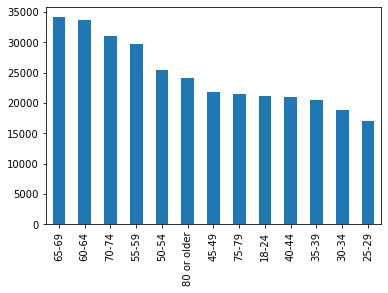

In [42]:
df['AgeCategory'].value_counts().plot(kind='bar')

In [43]:
#Map Binary Categorical columns yes:1, no:0

binary_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'DiffWalking',
               'PhysicalActivity', 'Asthma', 'KidneyDisease', 
               'SkinCancer', 'Stroke']

for binary_col in binary_cols:
    df[binary_col] = df[binary_col].map({'Yes': 1, 'No': 0})

In [44]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.175013,1,0,0,0.100000,1.0,0,Female,55-59,White,Yes,1,Very good,0.208333,1,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,Female,80 or older,White,No,1,Very good,0.291667,0,0,0
2,0,0.280232,1,0,0,0.666667,1.0,0,Male,65-69,White,Yes,1,Fair,0.333333,1,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,Female,75-79,White,No,0,Good,0.250000,0,0,1
4,0,0.249974,0,0,0,0.933333,0.0,1,Female,40-44,White,No,1,Very good,0.333333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.288983,1,0,0,0.233333,0.0,1,Male,60-64,Hispanic,Yes,0,Fair,0.250000,1,0,0
319791,0,0.314602,1,0,0,0.000000,0.0,0,Male,35-39,Hispanic,No,1,Very good,0.208333,1,0,0
319792,0,0.255561,0,0,0,0.000000,0.0,0,Female,45-49,Hispanic,No,1,Good,0.250000,0,0,0
319793,0,0.345915,0,0,0,0.000000,0.0,0,Female,25-29,Hispanic,No,0,Good,0.500000,0,0,0


In [45]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

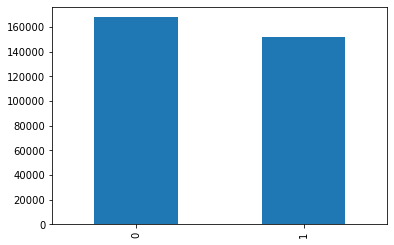

In [46]:
df['Sex'].value_counts().plot(kind='bar')

In [47]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [48]:
#ONE HOT ENCODE CATEGORICAL VARIABLES WITH MORE THAN TWO UNIQUE VALUES
df = pd.get_dummies(df, columns=['Diabetic', 'AgeCategory', 'Race', 'GenHealth'])

In [49]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.288983,1,0,0,0.233333,0.0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
319791,0,0.314602,1,0,0,0.000000,0.0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
319792,0,0.255561,0,0,0,0.000000,0.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
319793,0,0.345915,0,0,0,0.000000,0.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [52]:
#INDEPENDENT FEATURES(X)
#DEPENDENT FEATURE(HeartDisease)

X = df.drop(columns=['HeartDisease'], axis=1)
y = df['HeartDisease']

In [53]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0.175013,1,0,0,0.100000,1.0,0,0,1,0.208333,...,0,0,0,0,1,0,0,0,0,1
1,0.214444,0,0,1,0.000000,0.0,0,0,1,0.291667,...,0,0,0,0,1,0,0,0,0,1
2,0.280232,1,0,0,0.666667,1.0,0,1,1,0.333333,...,0,0,0,0,1,0,1,0,0,0
3,0.255245,0,0,0,0.000000,0.0,0,0,0,0.250000,...,0,0,0,0,1,0,0,1,0,0
4,0.249974,0,0,0,0.933333,0.0,1,0,1,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.288983,1,0,0,0.233333,0.0,1,1,0,0.250000,...,0,0,1,0,0,0,1,0,0,0
319791,0.314602,1,0,0,0.000000,0.0,0,1,1,0.208333,...,0,0,1,0,0,0,0,0,0,1
319792,0.255561,0,0,0,0.000000,0.0,0,0,1,0.250000,...,0,0,1,0,0,0,0,1,0,0
319793,0.345915,0,0,0,0.000000,0.0,0,0,0,0.500000,...,0,0,1,0,0,0,0,1,0,0


In [54]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [55]:
#TRAIN TEST SPLIT
#Split the dataset, 80% training, 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print('Training Datasets Dimensions\n')

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\nTesting Datasets Dimensions\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Training Datasets Dimensions

X_train: (255836, 41)
y_train: (255836,)

Testing Datasets Dimensions

X_test: (63959, 41)
y_test: (63959,)


In [56]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [58]:
#since this is a binary classification problem check output layer
print('Output layer size:', clf.n_outputs_)
print('Output layer activation function:', clf.out_activation_)

print('Number of layers in neural network:', clf.n_layers_)
print('Number of features:', clf.n_features_in_)
print('Number of iterations ran:', clf.n_iter_)

Output layer size: 1
Output layer activation function: logistic
Number of layers in neural network: 3
Number of features: 41
Number of iterations ran: 70


In [59]:
y_pred = clf.predict(X_test)

In [60]:
#model accuracy
clf.score(X_test, y_test)

0.9133038352694695

C:\Users\Mia\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


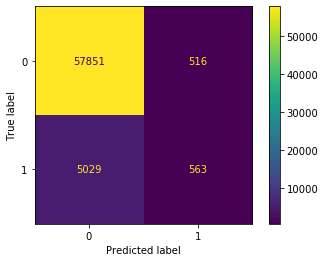

In [61]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

In [64]:
#Tensorflow and keras sequential model binary classification

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models, layers

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2688      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
1999/1999 [==============================] - 6s 3ms/step - loss: 0.2316 - accuracy: 0.9153
Epoch 2/5
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2246 - accuracy: 0.9166
Epoch 3/5
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2239 - accuracy: 0.9167
Epoch 4/5
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2235 - accuracy: 0.9166
Epoch 5/5
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2232 - accuracy: 0.9170


In [69]:
model.evaluate(X_test, y_test)

1999/1999 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9139


[0.2302832007408142, 0.9139136075973511]